## Macromolecules : Binding Affinity and Fractional Occupancy
  

LAST REVISED: June 23, 2024 (using v. 1.0 beta36)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from life123 import ChemData
from life123 import UniformCompartment
from life123 import MovieTabular

import numpy as np

import plotly.express as px

In [3]:
# Initialize the system
chem = ChemData(names=["A", "B", "C"])

## Explore methods to manage the data structure for macromolecules

In [4]:
chem.add_macromolecules("M1")
chem.get_macromolecules()

['M1']

In [5]:
chem.set_binding_site_affinity("M1", site_number=3,  ligand="A", Kd=1.0)
chem.set_binding_site_affinity("M1", site_number=8,  ligand="B", Kd=3.2)
chem.set_binding_site_affinity("M1", site_number=15, ligand="A", Kd=10.0)

chem.set_binding_site_affinity("M2", site_number=1, ligand="C", Kd=5.6)    # "M2" will get automatically added
chem.set_binding_site_affinity("M2", site_number=2, ligand="A", Kd=0.01)

In [6]:
chem.show_binding_affinities()        # Review the values we have given for the dissociation constants

M1  :
   Site 3 - Kd (dissociation const) for A : 1.0
   Site 8 - Kd (dissociation const) for B : 3.2
   Site 15 - Kd (dissociation const) for A : 10.0
M2  :
   Site 1 - Kd (dissociation const) for C : 5.6
   Site 2 - Kd (dissociation const) for A : 0.01


In [7]:
chem.get_binding_sites("M1")

[3, 8, 15]

In [8]:
chem.get_binding_sites_and_ligands("M1")

{3: 'A', 8: 'B', 15: 'A'}

In [9]:
chem.get_binding_sites("M2")

[1, 2]

In [10]:
chem.get_binding_sites_and_ligands("M2")

{1: 'C', 2: 'A'}

In [11]:
aff = chem.get_binding_site_affinity(macromolecule="M2", site_number=1)   # A "NamedTuple" gets returned
aff

ChemicalAffinity(chemical='C', Kd=5.6)

In [12]:
aff.chemical

'C'

In [13]:
aff.Kd

5.6

## Start setting up the dynamical system

In [14]:
dynamics = UniformCompartment(chem_data=chem)

In [15]:
dynamics.set_macromolecules()      # By default, set counts to 1 for all the registered macromolecules

In [16]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). No concentrations set yet
  Species 1 (B). No concentrations set yet
  Species 2 (C). No concentrations set yet
Macro-molecules, with their counts:  {'M1': 1, 'M2': 1}
Fractional Occupancy at the various binding sites for each macro-molecule:
     M1 || 3: 0.0 (A) | 8: 0.0 (B) | 15: 0.0 (A)
     M2 || 1: 0.0 (C) | 2: 0.0 (A)
Set of chemicals involved in reactions: set()


### Inspect some class attributes (not to be directly modified by the end user!)

In [17]:
dynamics.macro_system

{'M1': 1, 'M2': 1}

In [18]:
dynamics.macro_system_state

{'M1': {3: ('A', 0.0), 8: ('B', 0.0), 15: ('A', 0.0)},
 'M2': {1: ('C', 0.0), 2: ('A', 0.0)}}

### Set the initial concentrations of all the ligands

In [19]:
dynamics.set_conc(conc={"A": 10., "B": 0., "C": 0.56})
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.56
Macro-molecules, with their counts:  {'M1': 1, 'M2': 1}
Fractional Occupancy at the various binding sites for each macro-molecule:
     M1 || 3: 0.0 (A) | 8: 0.0 (B) | 15: 0.0 (A)
     M2 || 1: 0.0 (C) | 2: 0.0 (A)
Set of chemicals involved in reactions: set()


### Determine and adjust the fractional occupancy of the various sites on the macromolecules, based on the current ligand concentrations

In [20]:
dynamics.update_occupancy()

In [21]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.56
Macro-molecules, with their counts:  {'M1': 1, 'M2': 1}
Fractional Occupancy at the various binding sites for each macro-molecule:
     M1 || 3: 0.8999999930397401 (A) | 8: 1.6007639537264433e-15 (B) | 15: 0.5 (A)
     M2 || 1: 0.10000000696026 (C) | 2: 0.9986301366689166 (A)
Set of chemicals involved in reactions: set()


In [22]:
dynamics.chem_data.show_binding_affinities()        # Review the values we had given for the dissociation constants

M1  :
   Site 3 - Kd (dissociation const) for A : 1.0
   Site 8 - Kd (dissociation const) for B : 3.2
   Site 15 - Kd (dissociation const) for A : 10.0
M2  :
   Site 1 - Kd (dissociation const) for C : 5.6
   Site 2 - Kd (dissociation const) for A : 0.01


#### Notes:
**[B] = 0** => Occupancy of binding site 8 of M1 is also zero

**[A] = 10.0** :   
            * 10x the dissociation constant of A to site 3 of M1 (resulting in occupancy 0.9)  
            * same as the dissociation constant of A to site 15 of M1 (occupancy 0.5)  
            * 1,000x the dissociation constant of A to site 2 of M2 (occupancy almost 1, i.e. nearly saturated)
        
            
**[C] = 0.56** => 1/10 of the dissociation constant of C to site 1 of M2 (occupancy 0.1)

### Adjust the concentration of one ligand, [A], and update all the fractional occupancies accordingly

In [23]:
dynamics.set_single_conc(conc=1000., species_name="A", snapshot=False)

In [24]:
dynamics.update_occupancy()

In [25]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 1000.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.56
Macro-molecules, with their counts:  {'M1': 1, 'M2': 1}
Fractional Occupancy at the various binding sites for each macro-molecule:
     M1 || 3: 0.9986301366689166 (A) | 8: 1.6007639537264433e-15 (B) | 15: 0.9878048761855343 (A)
     M2 || 1: 0.10000000696026 (C) | 2: 0.9999830651924357 (A)
Set of chemicals involved in reactions: set()


#### Note how all the various binding sites for ligand A, across all macromolecules, now have a different value for the fractional occupancy (very close to 1 because of the large value of [A] relative to each of the dissociation constants for A.)
The fractional occupancies for the other ligands (B and C) did not change

### Sweep the values of [A] across a wide range, and compute/store how the fractional occupancies of A change

In [26]:
history = MovieTabular(parameter_name="[A]")  # A convenient way to store a sequence of "state snapshots" as a Pandas dataframe

In [27]:
print(history)

`MovieTabular` object with 0 snapshot(s) parametrized by `[A]`


In [28]:
# Generate a sweep of [A] values along a log scale, from very low to very high (relative to the dissociation constants)
start = 0.001
stop = 200.
num_points = 100

log_values = np.logspace(np.log10(start), np.log10(stop), num=num_points)

print(log_values)

[1.00000000e-03 1.13121657e-03 1.27965093e-03 1.44756233e-03
 1.63750649e-03 1.85237447e-03 2.09543670e-03 2.37039271e-03
 2.68142751e-03 3.03327522e-03 3.43129119e-03 3.88153345e-03
 4.39085495e-03 4.96700787e-03 5.61876160e-03 6.35603621e-03
 7.19005348e-03 8.13350762e-03 9.20075859e-03 1.04080506e-02
 1.17737592e-02 1.33186715e-02 1.50663019e-02 1.70432503e-02
 1.92796072e-02 2.18094111e-02 2.46711672e-02 2.79084331e-02
 3.15704819e-02 3.57130522e-02 4.03991964e-02 4.57002403e-02
 5.16968690e-02 5.84803548e-02 6.61539463e-02 7.48344401e-02
 8.46539585e-02 9.57619605e-02 1.08327516e-01 1.22541881e-01
 1.38621407e-01 1.56810832e-01 1.77387011e-01 2.00663126e-01
 2.26993453e-01 2.56778755e-01 2.90472382e-01 3.28587172e-01
 3.71703253e-01 4.20476878e-01 4.75650411e-01 5.38063626e-01
 6.08666489e-01 6.88533617e-01 7.78880636e-01 8.81082680e-01
 9.96695326e-01 1.12747827e+00 1.27542210e+00 1.44277861e+00
 1.63209507e+00 1.84625298e+00 2.08851196e+00 2.36255934e+00
 2.67256626e+00 3.023251

In [29]:
# Set [A] to each of the above values in turn, and determine/store the applicable fractional occupancies (for the sites where A binds)
for A_conc in log_values:
    dynamics.set_single_conc(conc=A_conc, species_name="A", snapshot=False)
    dynamics.update_occupancy()
    history.store(A_conc, {"M1 site 3": dynamics.get_occupancy(macromolecule="M1", site_number=3), 
                           "M1 site 15": dynamics.get_occupancy(macromolecule="M1", site_number=15), 
                           "M2 site 2": dynamics.get_occupancy(macromolecule="M2", site_number=2)})

In [30]:
df = history.get_dataframe()
df

[A]  M1 site 3  M1 site 15  M2 site 2 caption
0     0.001000   0.001370    0.000152   0.100000        
1     0.001131   0.001541    0.000171   0.111098        
2     0.001280   0.001733    0.000193   0.123259        
3     0.001448   0.001949    0.000217   0.136547        
4     0.001638   0.002191    0.000244   0.151021        
..         ...        ...         ...        ...     ...
95  122.136920   0.989902    0.915911   0.999874        
96  138.163308   0.991013    0.924540   0.999888        
97  156.292623   0.992002    0.932349   0.999900        
98  176.800805   0.992884    0.939403   0.999912        
99  200.000000   0.993669    0.945764   0.999921        

[100 rows x 5 columns]

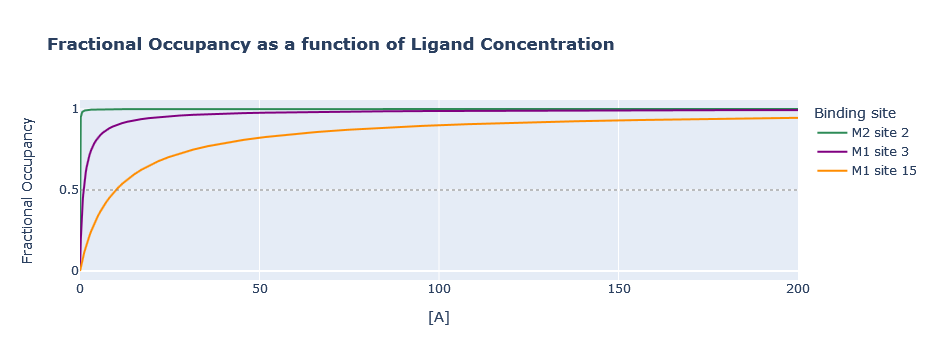

In [31]:
# Plot each of the fractional occupancies as a function of [A]

fig = px.line(data_frame=df, 
              x="[A]", y=["M2 site 2", "M1 site 3", "M1 site 15"],
              color_discrete_sequence = ["seagreen", "purple", "darkorange"],
              title="<b>Fractional Occupancy as a function of Ligand Concentration</b>",
              labels={"value":"Fractional Occupancy", "variable":"Binding site"})

fig.add_hline(y=0.5, line_width=1, line_dash="dot", line_color="gray")  # Horizontal line at 50% occupancy

fig.show()

In [32]:
import plotly.graph_objects as go 

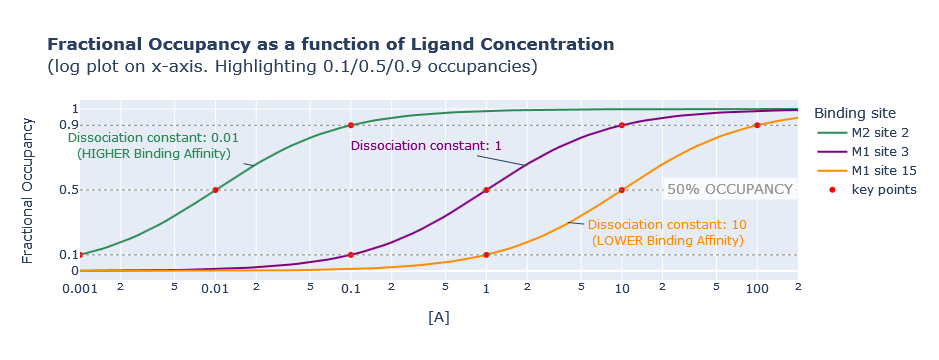

In [33]:
# Same plot, but use a log scale for [A]

fig = px.line(data_frame=df, 
              x="[A]", y=["M2 site 2", "M1 site 3", "M1 site 15"],
              color_discrete_sequence = ["seagreen", "purple", "darkorange"],           
              log_x=True, range_x=[start,200],              
              title="<b>Fractional Occupancy as a function of Ligand Concentration</b> <br>(log plot on x-axis. Highlighting 0.1/0.5/0.9 occupancies)",
              labels={"value":"Fractional Occupancy", "variable":"Binding site"})

# Horizontal lines
fig.add_hline(y=0.1, line_width=1, line_dash="dot", line_color="gray")
fig.add_hline(y=0.5, line_width=1, line_dash="dot", line_color="gray")
fig.add_hline(y=0.9, line_width=1, line_dash="dot", line_color="gray")

# Annotations (x values adjusted for the log scale)
fig.add_annotation(x=-1.715, y=0.65, 
                   text="Dissociation constant: 0.01<br>(HIGHER Binding Affinity)", font=dict(size=12, color="seagreen"), showarrow=True, ax=-100, ay=-20)
fig.add_annotation(x=0.3, y=0.65, 
                   text="Dissociation constant: 1", font=dict(size=12, color="purple"), showarrow=True, ax=-100, ay=-20)
fig.add_annotation(x=0.6, y=0.3, 
                   text="Dissociation constant: 10<br>(LOWER Binding Affinity)", font=dict(size=12, color="darkorange"), showarrow=True, ax=100, ay=10)

fig.add_annotation(x=1.8, y=0.51, 
                   text="50% OCCUPANCY", font=dict(size=14, color="gray"), bgcolor="white", opacity=0.8, showarrow=False)

# Customize y-axis tick values
additional_y_values = [0.1, 0.5, 0.9]  # Additional values to show on y-axis
fig.update_layout(yaxis={"tickvals": list(fig.layout.yaxis.domain) + additional_y_values})
 
# Add scatter points (dots) to the plot, to highlight the 0.1/0.5/0.9 occupancies
fig.add_scatter(x=[0.01, 1, 10,     0.001, 0.1, 1.,     0.1, 10, 100 ], 
                y=[0.5, 0.5, 0.5,    0.1, 0.1, 0.1,     0.9, 0.9, 0.9], 
                mode="markers", marker={"color": "red"}, name="key points")
    
fig.show()

#### When the binding affinity is lower (i.e. higher Dissociation Constant, Kd, orange curve), it takes higher ligand concentrations to attain the same fractional occupancies

Note that fractional occupancy 0.1 occurs at ligand concentrations of 1/10 the dissociation constant (Kd);   
occupancy 0.5 occurs at ligand concentrations equals to the dissociation constant;  
occupancy 0.9 occurs at ligand concentrations of 10x the dissociation constant.  

## The above simulation captures what's shown on Fig. 3A of 
#### https://doi.org/10.1146/annurev-cellbio-100617-062719 
("Low-Affinity Binding Sites and the Transcription Factor Specificity Paradox in Eukaryotes"), a paper that guided this simulation

#### In upcoming versions of Life123, the fractional occupancy values will regulate the rates of reactions catalyzed by the macromolecules...